In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/murie/Downloads/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


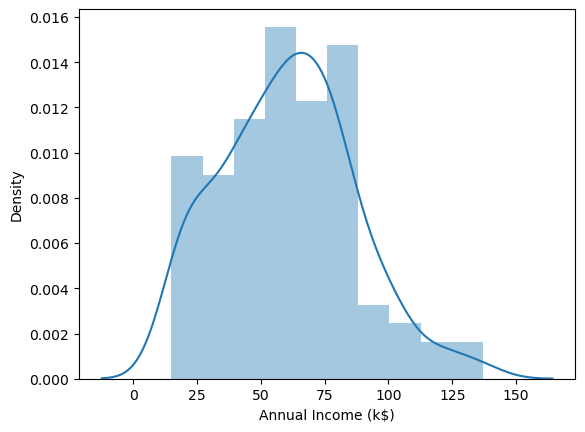

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

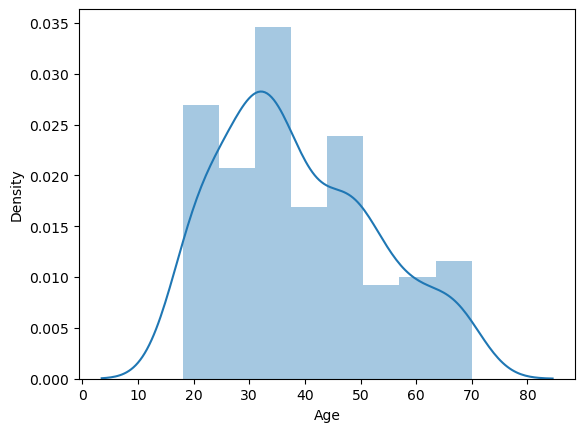

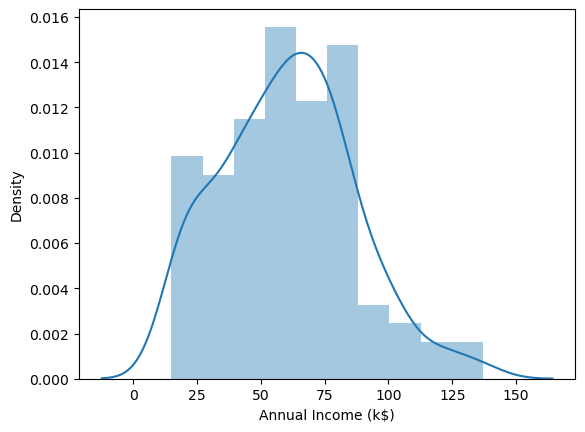

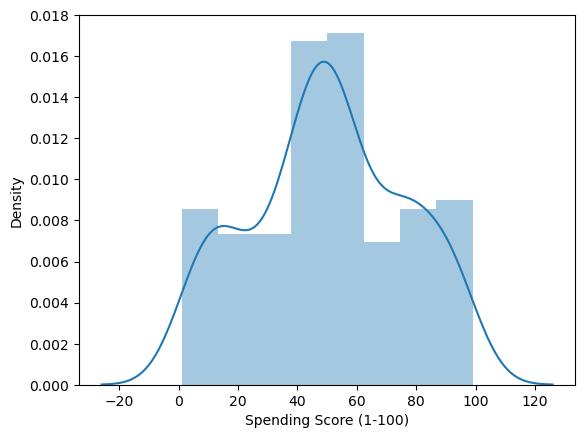

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

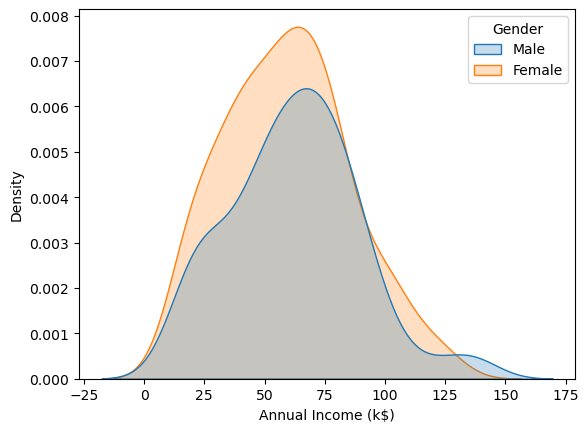

In [8]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)
plt.show()

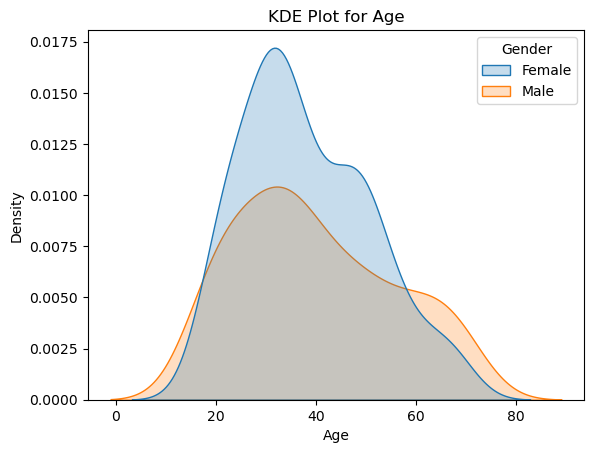

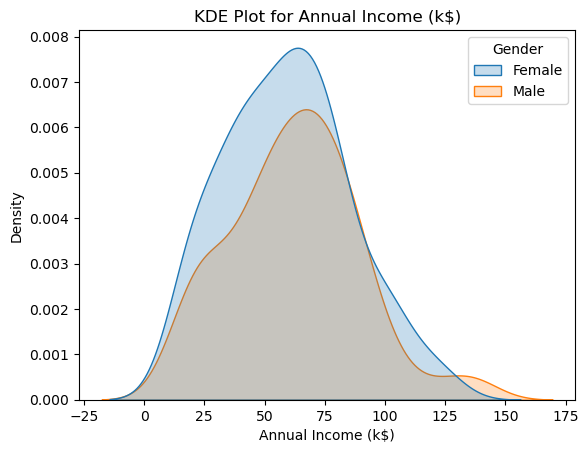

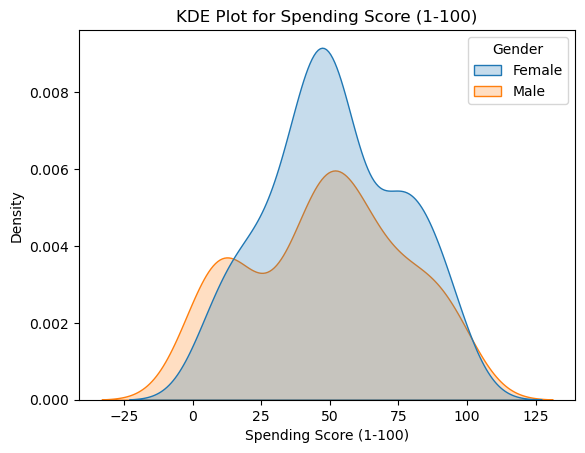

In [9]:
# Convert 'Gender' column to categorical type
df['Gender'] = df['Gender'].astype('category')

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot KDE for each column with shading and coloring by 'Gender'
for column in columns:
    sns.kdeplot(data=df, x=column, shade=True, hue='Gender')
    plt.title(f'KDE Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


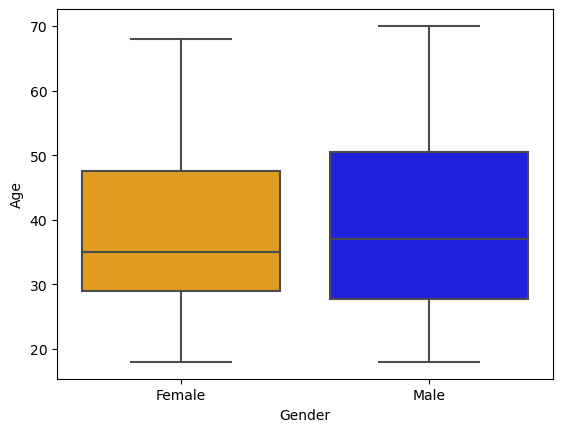

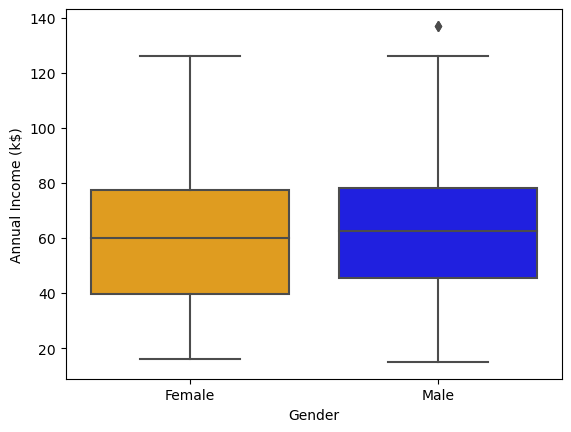

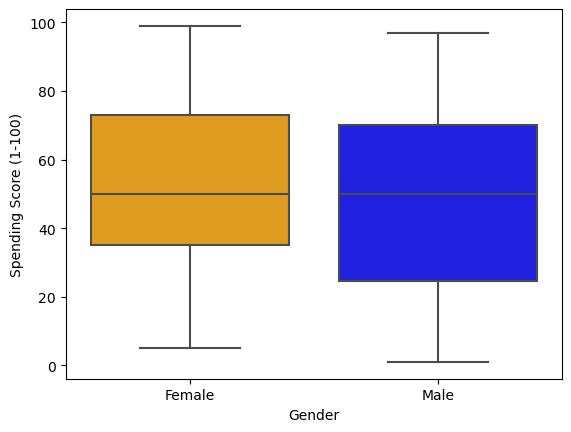

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
custom_palette = {"Male": "blue", "Female": "orange"}
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y= df[i], palette=custom_palette)

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

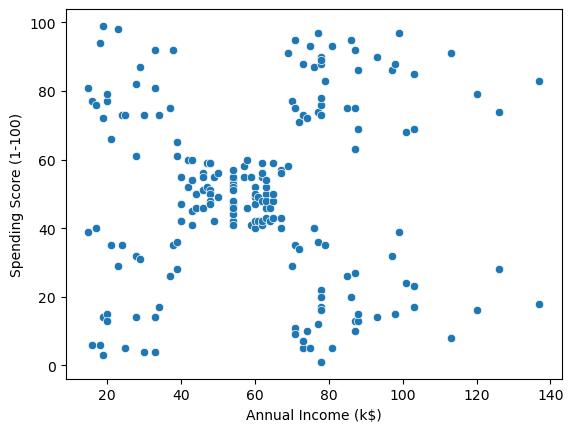

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

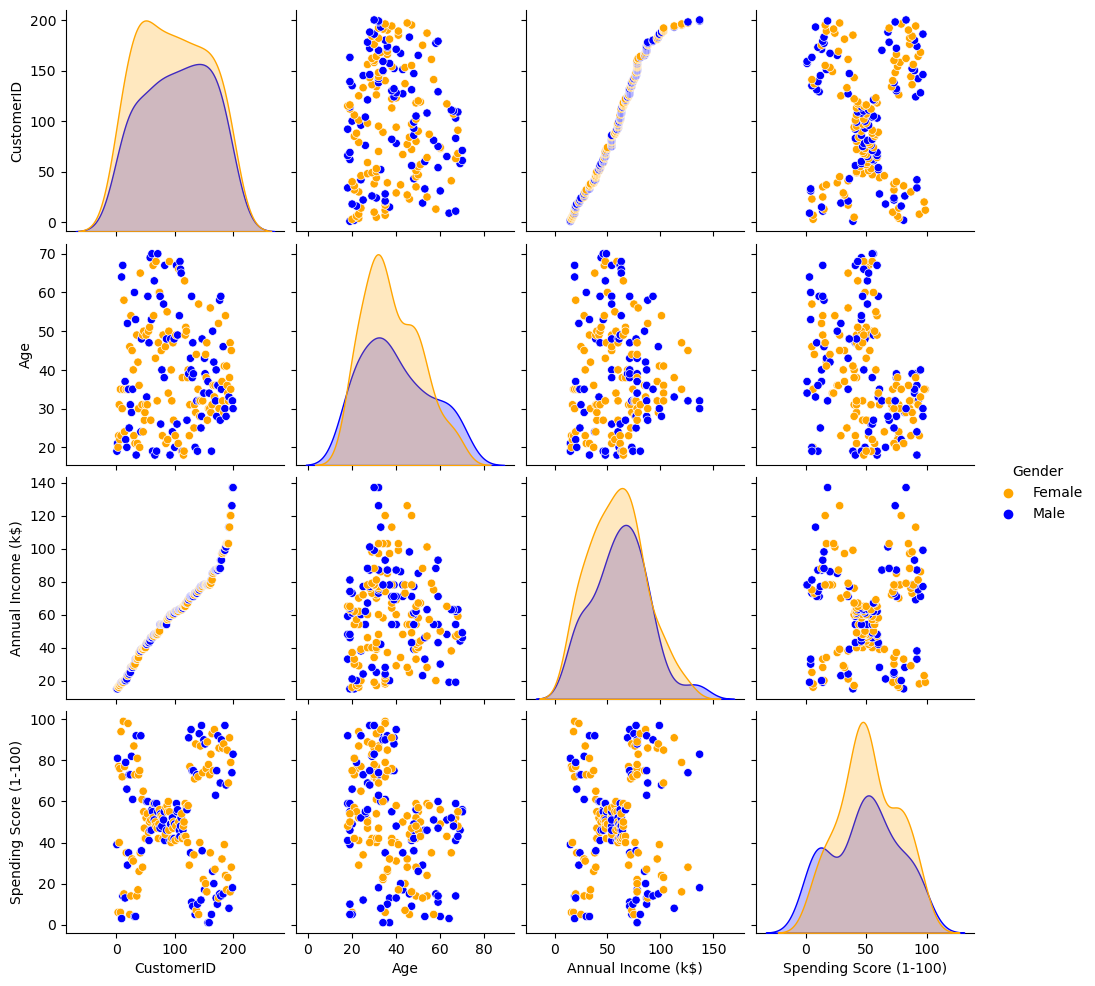

In [13]:
# Define custom palette with colors swapped for male and female
custom_palette = {"Male": "blue", "Female": "orange"}

# Pass the custom palette to the palette parameter in sns.pairplot()
sns.pairplot(df, hue='Gender', palette=custom_palette)


In [14]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

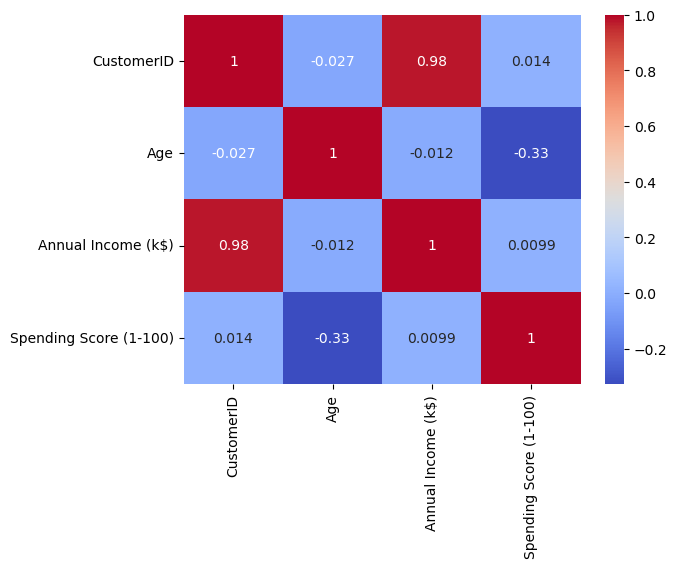

In [26]:
sns.heatmap(df.corr(),ann)

# Clustering-Univariate,Bivariate,Multivariate

In [42]:
clustering1 = KMeans()

In [38]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [39]:
clustering1.labels_

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3])

In [56]:
clustering1 = KMeans(n_clusters=6)  


df['Income Cluster'] = clustering1.fit_predict(df[['Annual Income (k$)']])

# Display the DataFrame with cluster labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [57]:
df['Income Cluster'].value_counts()

Income Cluster
5    48
1    42
2    42
3    32
0    28
4     8
Name: count, dtype: int64

In [58]:
clustering1.inertia_

5050.904761904763

In [63]:
from sklearn.cluster import KMeans

inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(-kmeans.score(df[['Annual Income (k$)']]))

inertia_scores


[137277.28,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8493.229304029306,
 5050.904761904762,
 3949.2756132756144,
 2822.4996947496943,
 2423.426257076257,
 1743.477272727273]

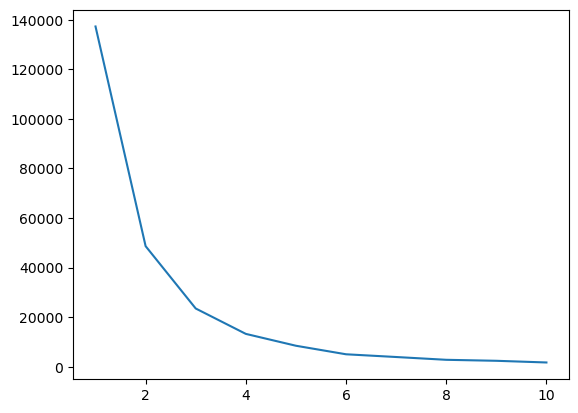

In [64]:
plt.plot(range(1,11),inertia_scores)

In [66]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.214286,93.000000,50.928571
1,43.000000,42.238095,50.666667
2,35.428571,75.095238,51.095238
3,34.906250,22.000000,49.656250
4,36.500000,124.000000,49.625000
5,41.604167,60.083333,49.041667


In [67]:
#bivariate clustering

In [85]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_

df['Spending and Income Cluster']= clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,3,3


In [86]:
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(-kmeans2.score(df[['Annual Income (k$)','Spending Score (1-100)']]))

inertia_scores2

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 37265.865204843474,
 30259.65720728547,
 25030.38309852033,
 21829.135638779826,
 19664.685196005546]

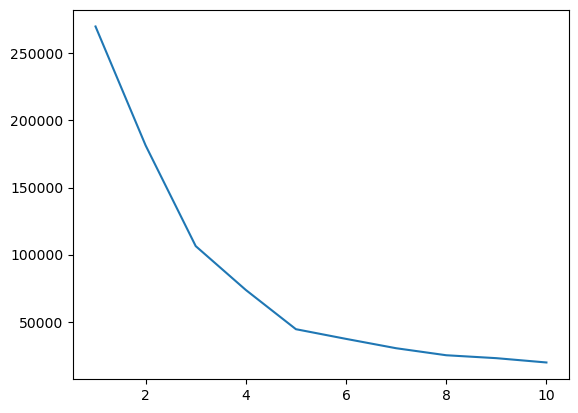

In [80]:
plt.plot(range(1,11),inertia_scores2)

In [90]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

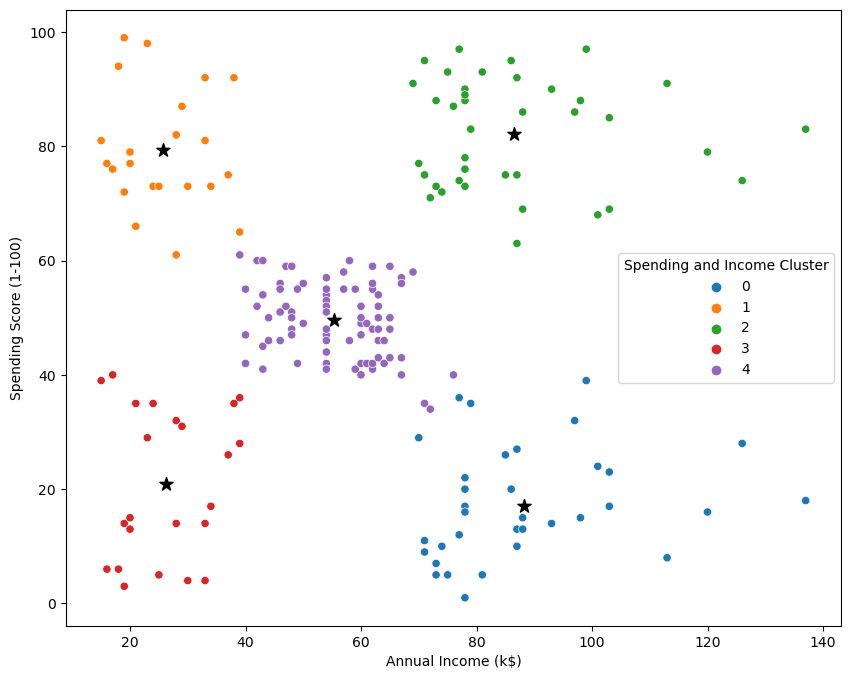

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10')


In [95]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.538462,0.461538
3,0.608696,0.391304
4,0.592593,0.407407


In [98]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


In [99]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,3,3


In [102]:
dff = pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,1,19,15,39,3,3,False,True
1,2,21,15,81,3,1,False,True
2,3,20,16,6,3,3,True,False
3,4,23,16,77,3,1,True,False
4,5,31,17,40,3,3,True,False


In [103]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [104]:
dff =dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the data
dff_scaled = scaler.fit_transform(dff)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
